In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
jokes = pd.read_excel('jokes.xlsx')
users = pd.read_excel('users.xlsx')

In [6]:
jokes

,ID,Joke,Keyword,BERT rating,Funny rating,Offensive rating,Surprise rating,Reality rep rating,Username
0,1,You know you're a Monash Malaysia student when...,Monash,0.373286,1,1,1,0,yennileong
1,2,"Uncle Roger tells you, Monash students are lik...",Monash,0.254151,3,1,3,1,yennileong
2,3,"Aiyoh, Monash students spend more time searchi...",Monash,-0.133187,4,1,4,1,yennileong
3,4,"In Malaysia, we have a 'two-in-one' parenting ...",parenting,-0.094748,3,1,3,1,yennileong
4,5,You know you're a Malaysian parent when you've...,parenting,-0.218633,2,1,2,1,yennileong
...,...,...,...,...,...,...,...,...,...
670,531,You know you're in a Malaysian school when you...,education,-0.004247,1,1,1,0,benleong
671,532,Malaysian schools are the only place where 're...,education,-0.695507,1,1,1,0,benleong
672,533,Why did the Monash Confession page get a Miche...,Monash confession,-0.058005,2,1,1,0,benleong
673,534,"Aiya, Monash Confession page, it's like a bowl...",Monash confession,-0.433682,1,1,1,0,benleong


In [7]:
users

,Username,Password,Age,Gender,Continent,Favourite Comedian,Personality
0,yennileong,yennileong,21,female,asia,shinchan,logician
1,Lee Shuhaida,123456,21,female,asia,Jimmy O. Young,executive
2,ccxy,ccxy,23,female,asia,NaN,architect
3,jensen,1234,20,male,asia,NaN,adventurer
4,elouise,123,23,female,asia,NaN,defender
5,Carissa,123,22,female,asia,NaN,mediator
6,pei ling,123,18,female,asia,NaN,adventurer
7,Michella,1234567,20,female,asia,NaN,executive
8,jayd0n,jscsSQUIDBOY666!,17,male,asia,NaN,debater
9,mohanrj,dinesh123,26,male,asia,NaN,virtuoso


In [8]:
jokes['ID'].nunique()

535

In [9]:
jokes['ID'] = range(1, len(jokes) + 1)
jokes['ID'].nunique()

675

In [10]:
jokes.groupby('Username')['Username'].nunique()

Username
BumBurritos     1
Carissa         1
DylanTan        1
Juuun           1
Lee Shuhaida    1
Michella        1
Nicholas        1
Rice            1
Seanleong       1
SueW            1
Tsam23          1
Winnie          1
ashikin123      1
benleong        1
calebtan_30     1
ccxy            1
elouise         1
jayd0n          1
jensen          1
kahhong01       1
meng yah        1
mohanrj         1
olivia          1
pei ling        1
rachellai_02    1
shadow          1
stephl58        1
tae7un          1
wenwen          1
wyteh28         1
yennileong      1
yincheng030     1
zafri           1
Name: Username, dtype: int64

In [11]:
df_all = jokes.merge(users.drop_duplicates(), on=['Username'], 
                   how='left', indicator=True)
df_all

,ID,Joke,Keyword,BERT rating,Funny rating,Offensive rating,Surprise rating,Reality rep rating,Username,Password,Age,Gender,Continent,Favourite Comedian,Personality,_merge
0,1,You know you're a Monash Malaysia student when...,Monash,0.373286,1,1,1,0,yennileong,yennileong,21.0,female,asia,shinchan,logician,both
1,2,"Uncle Roger tells you, Monash students are lik...",Monash,0.254151,3,1,3,1,yennileong,yennileong,21.0,female,asia,shinchan,logician,both
2,3,"Aiyoh, Monash students spend more time searchi...",Monash,-0.133187,4,1,4,1,yennileong,yennileong,21.0,female,asia,shinchan,logician,both
3,4,"In Malaysia, we have a 'two-in-one' parenting ...",parenting,-0.094748,3,1,3,1,yennileong,yennileong,21.0,female,asia,shinchan,logician,both
4,5,You know you're a Malaysian parent when you've...,parenting,-0.218633,2,1,2,1,yennileong,yennileong,21.0,female,asia,shinchan,logician,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,671,You know you're in a Malaysian school when you...,education,-0.004247,1,1,1,0,benleong,hello,22.0,male,asia,NaN,defender,both
671,672,Malaysian schools are the only place where 're...,education,-0.695507,1,1,1,0,benleong,hello,22.0,male,asia,NaN,defender,both
672,673,Why did the Monash Confession page get a Miche...,Monash confession,-0.058005,2,1,1,0,benleong,hello,22.0,male,asia,NaN,defender,both
673,674,"Aiya, Monash Confession page, it's like a bowl...",Monash confession,-0.433682,1,1,1,0,benleong,hello,22.0,male,asia,NaN,defender,both


In [12]:
df_all.loc[df_all['_merge'] == 'left_only']

,ID,Joke,Keyword,BERT rating,Funny rating,Offensive rating,Surprise rating,Reality rep rating,Username,Password,Age,Gender,Continent,Favourite Comedian,Personality,_merge
490,491,"Happy went for a run, but her fitness tracker ...",Happy,0.102882,1,1,1,1,wyteh28,NaN,NaN,NaN,NaN,NaN,NaN,left_only
491,492,Happy thought she could conquer the world of t...,Happy,0.046490,1,1,1,1,wyteh28,NaN,NaN,NaN,NaN,NaN,NaN,left_only
492,493,"Happy tried her hand at gardening, but her pla...",Happy,0.035209,1,1,1,1,wyteh28,NaN,NaN,NaN,NaN,NaN,NaN,left_only
493,494,"Happy decided to become a beekeeper, but she q...",Happy,-0.151851,1,1,1,1,wyteh28,NaN,NaN,NaN,NaN,NaN,NaN,left_only
494,495,Happy went to a yoga class and tried to master...,Happy,-0.193610,1,1,1,1,wyteh28,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [13]:
jokes.Username.value_counts()

stephl58        40
kahhong01       25
jayd0n          25
yennileong      20
meng yah        20
shadow          20
olivia          20
wenwen          20
calebtan_30     20
DylanTan        20
yincheng030     20
rachellai_02    20
Tsam23          20
BumBurritos     20
ashikin123      20
Rice            20
SueW            20
Nicholas        20
Lee Shuhaida    20
Seanleong       20
Winnie          20
Juuun           20
zafri           20
tae7un          20
mohanrj         20
Michella        20
pei ling        20
Carissa         20
elouise         20
jensen          20
ccxy            20
benleong        20
wyteh28          5
Name: Username, dtype: int64

In [14]:
jokes = jokes[jokes.Username != 'wyteh28']
jokes

,ID,Joke,Keyword,BERT rating,Funny rating,Offensive rating,Surprise rating,Reality rep rating,Username
0,1,You know you're a Monash Malaysia student when...,Monash,0.373286,1,1,1,0,yennileong
1,2,"Uncle Roger tells you, Monash students are lik...",Monash,0.254151,3,1,3,1,yennileong
2,3,"Aiyoh, Monash students spend more time searchi...",Monash,-0.133187,4,1,4,1,yennileong
3,4,"In Malaysia, we have a 'two-in-one' parenting ...",parenting,-0.094748,3,1,3,1,yennileong
4,5,You know you're a Malaysian parent when you've...,parenting,-0.218633,2,1,2,1,yennileong
...,...,...,...,...,...,...,...,...,...
670,671,You know you're in a Malaysian school when you...,education,-0.004247,1,1,1,0,benleong
671,672,Malaysian schools are the only place where 're...,education,-0.695507,1,1,1,0,benleong
672,673,Why did the Monash Confession page get a Miche...,Monash confession,-0.058005,2,1,1,0,benleong
673,674,"Aiya, Monash Confession page, it's like a bowl...",Monash confession,-0.433682,1,1,1,0,benleong


In [15]:
jokes.Username.value_counts()

stephl58        40
kahhong01       25
jayd0n          25
yennileong      20
meng yah        20
shadow          20
olivia          20
wenwen          20
calebtan_30     20
DylanTan        20
yincheng030     20
rachellai_02    20
Tsam23          20
BumBurritos     20
ashikin123      20
Rice            20
SueW            20
Nicholas        20
Lee Shuhaida    20
Seanleong       20
Winnie          20
Juuun           20
zafri           20
tae7un          20
mohanrj         20
Michella        20
pei ling        20
Carissa         20
elouise         20
jensen          20
ccxy            20
benleong        20
Name: Username, dtype: int64

In [16]:
jokes[jokes.Username == 'kahhong01']

,ID,Joke,Keyword,BERT rating,Funny rating,Offensive rating,Surprise rating,Reality rep rating,Username
405,406,Why did the offensive start a band? Because he...,offensive,-0.034614,1,1,2,0,kahhong01
406,407,What did the offensive say to his parents when...,offensive,-0.067723,1,1,2,1,kahhong01
407,408,Why did the offensive become a referee? Becaus...,offensive,-0.149884,2,1,2,1,kahhong01
408,409,"How does the offensive define a ""balanced meal...",offensive,-0.247147,2,1,1,1,kahhong01
409,410,What's the offensive's favorite exercise? Jump...,offensive,-0.253027,1,1,1,1,kahhong01
410,411,What did the dog say to his friend who wanted ...,dog,0.309249,3,1,1,1,kahhong01
411,412,What do you get when you cross a dog with a ca...,dog,0.171189,1,1,1,1,kahhong01
412,413,Why did the dog refuse to play cards with the ...,dog,0.160625,3,1,1,1,kahhong01
413,414,Why don't dogs run marathons? Because they alw...,dog,0.018892,3,1,1,1,kahhong01
414,415,Did you hear about the dog who swallowed a fir...,dog,0.005224,1,1,1,1,kahhong01


In [17]:
index = jokes[ (jokes['ID'] >= 406) & (jokes['ID'] <= 410) ].index
jokes.drop(index , inplace=True)
jokes[jokes.Username == 'kahhong01']

C:\Users\RachelToh\AppData\Local\Temp\ipykernel_10580\208877188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jokes.drop(index , inplace=True)


,ID,Joke,Keyword,BERT rating,Funny rating,Offensive rating,Surprise rating,Reality rep rating,Username
410,411,What did the dog say to his friend who wanted ...,dog,0.309249,3,1,1,1,kahhong01
411,412,What do you get when you cross a dog with a ca...,dog,0.171189,1,1,1,1,kahhong01
412,413,Why did the dog refuse to play cards with the ...,dog,0.160625,3,1,1,1,kahhong01
413,414,Why don't dogs run marathons? Because they alw...,dog,0.018892,3,1,1,1,kahhong01
414,415,Did you hear about the dog who swallowed a fir...,dog,0.005224,1,1,1,1,kahhong01
415,416,You know you're a Monash Malaysia student when...,Monash,0.373286,1,1,1,0,kahhong01
416,417,"Uncle Roger tells you, Monash students are lik...",Monash,0.254151,2,1,1,1,kahhong01
417,418,"Aiyoh, Monash students spend more time searchi...",Monash,-0.133187,4,1,1,1,kahhong01
418,419,"In Malaysia, we have a 'two-in-one' parenting ...",parenting,-0.094748,1,1,1,0,kahhong01
419,420,You know you're a Malaysian parent when you've...,parenting,-0.218633,3,1,2,1,kahhong01


In [18]:
jokes.Username.value_counts()

stephl58        40
jayd0n          25
yennileong      20
meng yah        20
kahhong01       20
shadow          20
olivia          20
wenwen          20
calebtan_30     20
DylanTan        20
yincheng030     20
rachellai_02    20
Tsam23          20
BumBurritos     20
ashikin123      20
Rice            20
SueW            20
Nicholas        20
Lee Shuhaida    20
Seanleong       20
Winnie          20
Juuun           20
zafri           20
tae7un          20
mohanrj         20
Michella        20
pei ling        20
Carissa         20
elouise         20
jensen          20
ccxy            20
benleong        20
Name: Username, dtype: int64

In [19]:
jokes[jokes.Username == 'jayd0n']

,ID,Joke,Keyword,BERT rating,Funny rating,Offensive rating,Surprise rating,Reality rep rating,Username
225,226,"What did one hat say to the other hat? ""You st...",NaN,0.349695,2,1,2,0,jayd0n
226,227,Why was the computer cold? Because it left its...,NaN,0.185567,1,1,2,0,jayd0n
227,228,"What did one wall say to the other wall? ""I'll...",NaN,0.175431,2,1,2,0,jayd0n
228,229,Why did the scarecrow win an award? Because he...,NaN,0.024551,3,1,3,1,jayd0n
229,230,Why did the math book go to therapy? Because i...,NaN,-0.232199,2,2,2,0,jayd0n
305,306,You know you're a Monash Malaysia student when...,Monash,0.373286,1,3,1,0,jayd0n
306,307,"Uncle Roger tells you, Monash students are lik...",Monash,0.254151,5,5,5,1,jayd0n
307,308,"Aiyoh, Monash students spend more time searchi...",Monash,-0.133187,4,5,4,1,jayd0n
308,309,"In Malaysia, we have a 'two-in-one' parenting ...",parenting,-0.094748,4,3,4,1,jayd0n
309,310,You know you're a Malaysian parent when you've...,parenting,-0.218633,3,4,4,1,jayd0n


In [20]:
index = jokes[ (jokes['ID'] >= 226) & (jokes['ID'] <= 230) ].index
jokes.drop(index , inplace=True)
jokes[jokes.Username == 'jayd0n']

C:\Users\RachelToh\AppData\Local\Temp\ipykernel_10580\2177108057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jokes.drop(index , inplace=True)


,ID,Joke,Keyword,BERT rating,Funny rating,Offensive rating,Surprise rating,Reality rep rating,Username
305,306,You know you're a Monash Malaysia student when...,Monash,0.373286,1,3,1,0,jayd0n
306,307,"Uncle Roger tells you, Monash students are lik...",Monash,0.254151,5,5,5,1,jayd0n
307,308,"Aiyoh, Monash students spend more time searchi...",Monash,-0.133187,4,5,4,1,jayd0n
308,309,"In Malaysia, we have a 'two-in-one' parenting ...",parenting,-0.094748,4,3,4,1,jayd0n
309,310,You know you're a Malaysian parent when you've...,parenting,-0.218633,3,4,4,1,jayd0n
310,311,"In Malaysia, bedtime is a suggestion, not a ru...",parenting,-0.224419,5,5,5,1,jayd0n
311,312,"If Elsa were Malaysian, her signature line wou...",Elsa,-0.183139,2,2,2,1,jayd0n
312,313,Imagine Elsa trying to find Olaf in Malaysia –...,Elsa,0.090487,1,1,1,1,jayd0n
313,314,Why shouldn’t you give Elsa a balloon? Because...,Elsa,0.273976,3,3,3,1,jayd0n
314,315,"In Malaysia, we have three languages: Bahasa M...",education,-0.055867,2,2,2,0,jayd0n


In [21]:
jokes.Username.value_counts()

stephl58        40
yennileong      20
DylanTan        20
Rice            20
ashikin123      20
BumBurritos     20
Tsam23          20
rachellai_02    20
yincheng030     20
calebtan_30     20
meng yah        20
wenwen          20
olivia          20
shadow          20
kahhong01       20
SueW            20
Nicholas        20
Lee Shuhaida    20
Seanleong       20
jayd0n          20
Winnie          20
Juuun           20
zafri           20
tae7un          20
mohanrj         20
Michella        20
pei ling        20
Carissa         20
elouise         20
jensen          20
ccxy            20
benleong        20
Name: Username, dtype: int64

In [22]:
jokes[jokes.Username == 'stephl58']

,ID,Joke,Keyword,BERT rating,Funny rating,Offensive rating,Surprise rating,Reality rep rating,Username
265,266,What's the best way to impress a girl in this ...,love life,0.466945,1,1,1,1,stephl58
266,267,My dating life is like a rollercoaster. Exciti...,love life,0.380412,3,1,1,1,stephl58
267,268,They say you should never mix business with pl...,love life,0.278366,2,1,1,1,stephl58
268,269,"They say love is blind, but in my case, it nee...",love life,0.139251,2,1,1,1,stephl58
269,270,Relationships are like math problems. You thin...,love life,0.134890,4,1,2,1,stephl58
270,271,I told my chemistry teacher I wanted to make a...,science reality,0.513407,1,1,1,1,stephl58
271,272,I asked the mathematician if he wanted to hear...,science reality,0.122761,1,1,1,1,stephl58
272,273,Why do biologists cry easily?Because they have...,science reality,0.067506,1,3,1,1,stephl58
273,274,Did you hear about the math teacher who got pr...,science reality,0.046273,1,1,1,1,stephl58
274,275,What do you call a knight who loves science?Si...,science reality,-0.071099,2,1,1,1,stephl58


In [23]:
index = jokes[(jokes['ID'] >= 266) & (jokes['ID'] <= 285)].index
jokes.drop(index , inplace=True)

jokes[jokes.Username == 'stephl58']

C:\Users\RachelToh\AppData\Local\Temp\ipykernel_10580\3779877998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jokes.drop(index , inplace=True)


,ID,Joke,Keyword,BERT rating,Funny rating,Offensive rating,Surprise rating,Reality rep rating,Username
285,286,You know you're a Monash Malaysia student when...,Monash,0.373286,1,1,1,1,stephl58
286,287,"Uncle Roger tells you, Monash students are lik...",Monash,0.254151,2,1,1,1,stephl58
287,288,"Aiyoh, Monash students spend more time searchi...",Monash,-0.133187,4,1,1,1,stephl58
288,289,"In Malaysia, we have a 'two-in-one' parenting ...",parenting,-0.094748,4,1,1,1,stephl58
289,290,You know you're a Malaysian parent when you've...,parenting,-0.218633,2,1,1,1,stephl58
290,291,"In Malaysia, bedtime is a suggestion, not a ru...",parenting,-0.224419,4,1,1,1,stephl58
291,292,"If Elsa were Malaysian, her signature line wou...",Elsa,-0.183139,2,1,1,1,stephl58
292,293,Imagine Elsa trying to find Olaf in Malaysia –...,Elsa,0.090487,2,1,1,1,stephl58
293,294,Why shouldn’t you give Elsa a balloon? Because...,Elsa,0.273976,2,1,1,1,stephl58
294,295,"In Malaysia, we have three languages: Bahasa M...",education,-0.055867,1,1,1,1,stephl58


In [24]:
jokes.Username.value_counts()

yennileong      20
Lee Shuhaida    20
Rice            20
ashikin123      20
BumBurritos     20
Tsam23          20
rachellai_02    20
yincheng030     20
calebtan_30     20
meng yah        20
wenwen          20
olivia          20
shadow          20
kahhong01       20
SueW            20
DylanTan        20
Nicholas        20
Seanleong       20
jayd0n          20
stephl58        20
Winnie          20
Juuun           20
zafri           20
tae7un          20
mohanrj         20
Michella        20
pei ling        20
Carissa         20
elouise         20
jensen          20
ccxy            20
benleong        20
Name: Username, dtype: int64

In [25]:
jokes

,ID,Joke,Keyword,BERT rating,Funny rating,Offensive rating,Surprise rating,Reality rep rating,Username
0,1,You know you're a Monash Malaysia student when...,Monash,0.373286,1,1,1,0,yennileong
1,2,"Uncle Roger tells you, Monash students are lik...",Monash,0.254151,3,1,3,1,yennileong
2,3,"Aiyoh, Monash students spend more time searchi...",Monash,-0.133187,4,1,4,1,yennileong
3,4,"In Malaysia, we have a 'two-in-one' parenting ...",parenting,-0.094748,3,1,3,1,yennileong
4,5,You know you're a Malaysian parent when you've...,parenting,-0.218633,2,1,2,1,yennileong
...,...,...,...,...,...,...,...,...,...
670,671,You know you're in a Malaysian school when you...,education,-0.004247,1,1,1,0,benleong
671,672,Malaysian schools are the only place where 're...,education,-0.695507,1,1,1,0,benleong
672,673,Why did the Monash Confession page get a Miche...,Monash confession,-0.058005,2,1,1,0,benleong
673,674,"Aiya, Monash Confession page, it's like a bowl...",Monash confession,-0.433682,1,1,1,0,benleong


Text(0.5, 1.0, 'Funny Rating')

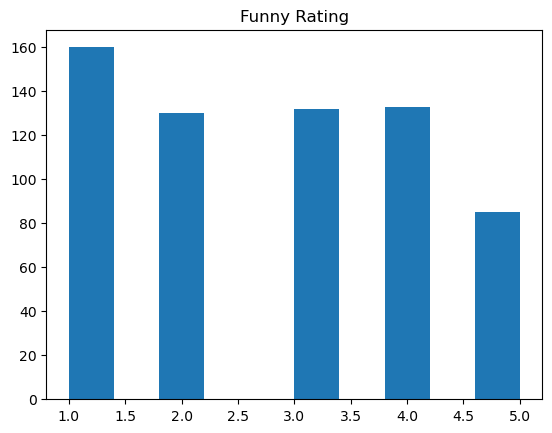

In [30]:
plt.hist(jokes['Funny rating'])
plt.title('Funny Rating')

Text(0.5, 1.0, 'Offensive Rating')

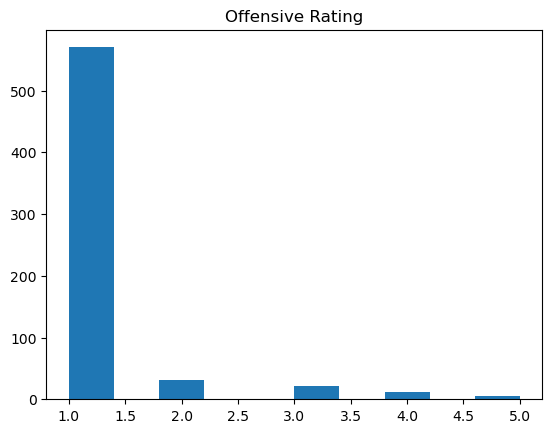

In [31]:
plt.hist(jokes['Offensive rating'])
plt.title('Offensive Rating')

Text(0.5, 1.0, 'Surprise Rating')

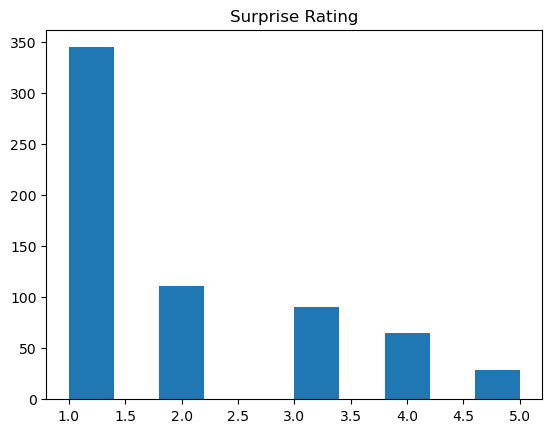

In [32]:
plt.hist(jokes['Surprise rating'])
plt.title('Surprise Rating')

{'whiskers': [<matplotlib.lines.Line2D at 0x1f48f246190>,
 'caps': [<matplotlib.lines.Line2D at 0x1f48f257110>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f48f238c90>,
 'medians': [<matplotlib.lines.Line2D at 0x1f48f268350>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f48f268bd0>,
 'means': []}

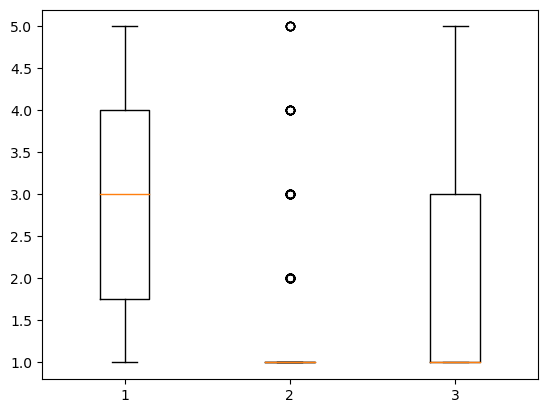

In [35]:
plt.boxplot(jokes[['Funny rating', 'Offensive rating', 'Surprise rating']])